In [1]:
import os, sys
sys.path.append(os.path.abspath('../../'))
import pandas as pd
import numpy as np
from EMAWorkbench import load_results
from utils.rl.hv import HyperVolume

def compute_hypervolume(df, antiutopia, utopia):
    array = df.values
    hv_computer = HyperVolume(antiutopia, utopia)
    return hv_computer.compute(array)

# Discrete Lake Problem

In [2]:
results_path='../../results/lake_discrete_performance/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea_1926216712',
 'ea_3087161096',
 'ea_3186775264',
 'ea_3690172787',
 'ea_462638671',
 'nes_1926216712_27-09-2022-19-00_best.csv',
 'nes_1926216712_27-09-2022-19-00_high.csv',
 'nes_3087161096_27-09-2022-19-01_best.csv',
 'nes_3087161096_27-09-2022-19-01_high.csv',
 'nes_3186775264_27-09-2022-19-02_best.csv',
 'nes_3186775264_27-09-2022-19-02_high.csv',
 'nes_3690172787_27-09-2022-19-03_best.csv',
 'nes_3690172787_27-09-2022-19-03_high.csv',
 'nes_462638671_27-09-2022-19-04_best.csv',
 'nes_462638671_27-09-2022-19-05_high.csv',
 'repsep_1926216712_27-09-2022-19-05_best.csv',
 'repsep_1926216712_27-09-2022-19-06_high.csv',
 'repsep_3087161096_27-09-2022-19-06_best.csv',
 'repsep_3087161096_27-09-2022-19-07_high.csv',
 'repsep_3186775264_27-09-2022-19-07_best.csv',
 'repsep_3186775264_27-09-2022-19-08_high.csv',
 'repsep_3690172787_27-09-2022-19-08_best.csv',
 'repsep_3690172787_27-09-2022-19-09_high.csv',
 'repsep_462638671_27-09-2022-19-09_best.csv',
 'repsep_462638671

In [3]:
ea_hv = []
for i in range(1, 6):
    ea=[]
    ea_files = sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
        ea.append(all_outcomes)
        # print(ea_files[j])
    ea=pd.DataFrame(ea)
    each_ea_hv = compute_hypervolume(ea, np.array([0, 0]), np.array([1.8, 1]))
    ea_hv.append(each_ea_hv)
    print(files[i])
    # print(ea)
    print(each_ea_hv)
ea_hv = np.array(ea_hv)
print(ea_hv.mean())
print(ea_hv.std())

ea_1926216712
0.4913667235746689
ea_3087161096
0.48870939566006766
ea_3186775264
0.4786833509694019
ea_3690172787
0.4708211511926038
ea_462638671
0.4846817528290869
0.4828524748451658
0.007379384168431614


In [4]:
nes_hv = []
for i in range(6, 16, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    each_nes_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([1.8, 1]))
    nes_hv.append(each_nes_hv)
    print(path)
    # print(nes)
    print(each_nes_hv)
nes_hv = np.array(nes_hv)
print(nes_hv.mean())
print(nes_hv.std())

nes_1926216712_27-09-2022-19-00_best.csv
0.5189223987402595
nes_3087161096_27-09-2022-19-01_best.csv
0.4846939030445376
nes_3186775264_27-09-2022-19-02_best.csv
0.4914326361121318
nes_3690172787_27-09-2022-19-03_best.csv
0.4865097844054993
nes_462638671_27-09-2022-19-04_best.csv
0.48965212446035167
0.49424216935255594
0.012562124646965342


In [5]:
repsep_hv = []
for i in range(16, 26, 2):
    path = files[i]
    repsep = pd.read_csv(results_path + path)
    each_repsep_hv = compute_hypervolume(repsep, np.array([0, 0]), np.array([1.8, 1]))
    repsep_hv.append(each_repsep_hv)
    print(path)
    # print(repsep)
    print(each_repsep_hv)
repsep_hv = np.array(repsep_hv)
print(repsep_hv.mean())
print(repsep_hv.std())

repsep_1926216712_27-09-2022-19-05_best.csv
0.48904062215431043
repsep_3087161096_27-09-2022-19-06_best.csv
0.4798165971036679
repsep_3186775264_27-09-2022-19-07_best.csv
0.48178488251718193
repsep_3690172787_27-09-2022-19-08_best.csv
0.4808573641510076
repsep_462638671_27-09-2022-19-09_best.csv
0.4841285108052535
0.48312559534628424
0.003282841286827358


In [6]:
ea=[]
ea_files = sorted(os.listdir(results_path + files[3]))
for i in range(len(ea_files)):
    _, all_outcomes=load_results(results_path + files[3] + "/" + ea_files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    print(files[3] + "/" + ea_files[i])
ea=pd.DataFrame(ea)
each_ea_hv = compute_hypervolume(ea, np.array([0, 0]), np.array([1.8, 1]))
ea["Algorithms"]="$\epsilon$-NSGA-II"
print(each_ea_hv)
ea

ea_3186775264/29-08-2022-17-01_0.tar.gz
ea_3186775264/29-08-2022-17-01_1.tar.gz
ea_3186775264/29-08-2022-17-01_10.tar.gz
ea_3186775264/29-08-2022-17-01_11.tar.gz
ea_3186775264/29-08-2022-17-01_12.tar.gz
ea_3186775264/29-08-2022-17-01_13.tar.gz
ea_3186775264/29-08-2022-17-01_14.tar.gz
ea_3186775264/29-08-2022-17-01_15.tar.gz
ea_3186775264/29-08-2022-17-01_16.tar.gz
ea_3186775264/29-08-2022-17-01_17.tar.gz
ea_3186775264/29-08-2022-17-01_18.tar.gz
ea_3186775264/29-08-2022-17-01_19.tar.gz
ea_3186775264/29-08-2022-17-01_2.tar.gz
ea_3186775264/29-08-2022-17-01_20.tar.gz
ea_3186775264/29-08-2022-17-01_21.tar.gz
ea_3186775264/29-08-2022-17-01_22.tar.gz
ea_3186775264/29-08-2022-17-01_23.tar.gz
ea_3186775264/29-08-2022-17-01_24.tar.gz
ea_3186775264/29-08-2022-17-01_25.tar.gz
ea_3186775264/29-08-2022-17-01_26.tar.gz
ea_3186775264/29-08-2022-17-01_27.tar.gz
ea_3186775264/29-08-2022-17-01_28.tar.gz
ea_3186775264/29-08-2022-17-01_29.tar.gz
ea_3186775264/29-08-2022-17-01_3.tar.gz
ea_3186775264/29-08-

,utility,reliability,Algorithms
0,0.871451,0.535354,$\epsilon$-NSGA-II
1,1.092134,0.363636,$\epsilon$-NSGA-II
2,1.006053,0.424242,$\epsilon$-NSGA-II
3,0.762204,0.646465,$\epsilon$-NSGA-II
4,0.703756,0.717172,$\epsilon$-NSGA-II
...,...,...,...
63,1.405146,0.191919,$\epsilon$-NSGA-II
64,0.667597,0.767677,$\epsilon$-NSGA-II
65,0.905367,0.505051,$\epsilon$-NSGA-II
66,0.916391,0.494949,$\epsilon$-NSGA-II


In [7]:
path = files[10]
nes = pd.read_csv(results_path + path)
nes_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([1.8, 1]))
nes["Algorithms"]="MO-NES"
print(path)
print(nes_hv)
nes

nes_3186775264_27-09-2022-19-02_best.csv
0.4914326361121318


,utility,reliability,Algorithms
0,1.437023,0.111111,MO-NES
1,1.224021,0.212121,MO-NES
2,1.066088,0.303030,MO-NES
3,1.111589,0.262626,MO-NES
4,0.622147,0.696970,MO-NES
5,1.281735,0.191919,MO-NES
6,0.985073,0.353535,MO-NES
7,0.860322,0.464646,MO-NES
8,1.359327,0.141414,MO-NES
9,1.433831,0.121212,MO-NES


In [8]:
path = files[20]
repsep = pd.read_csv(results_path + path)
repsep_hv = compute_hypervolume(repsep, np.array([0, 0]), np.array([1.8, 1]))
repsep["Algorithms"]="MO-eREPS"
print(path)
print(repsep_hv)
repsep

repsep_3186775264_27-09-2022-19-07_best.csv
0.48178488251718193


,utility,reliability,Algorithms
0,0.775717,0.525253,MO-eREPS
1,1.402995,0.131313,MO-eREPS
2,1.460375,0.101010,MO-eREPS
3,0.995077,0.353535,MO-eREPS
4,0.817177,0.494949,MO-eREPS
5,0.796111,0.515152,MO-eREPS
6,1.619592,0.090909,MO-eREPS
7,1.109892,0.282828,MO-eREPS
8,0.616859,0.585859,MO-eREPS
9,1.158339,0.242424,MO-eREPS


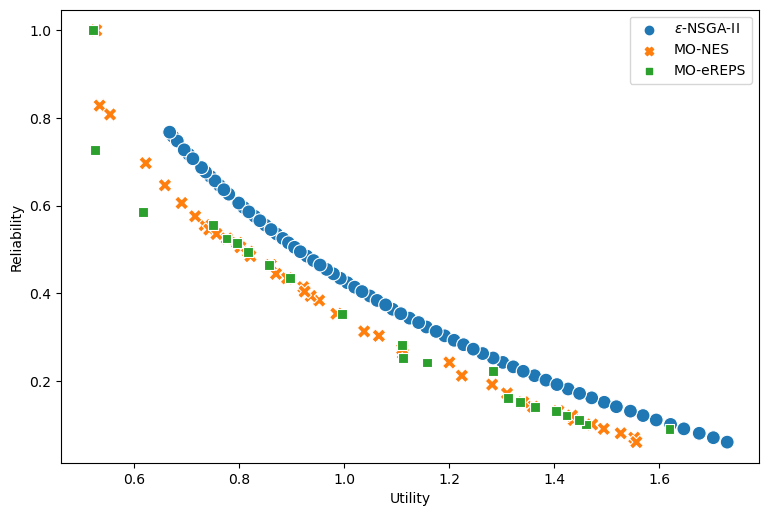

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

# Deep Lake Problem

In [10]:
results_path='../../results/lake_robust_performance/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea_10th_1926216712',
 'ea_10th_3087161096',
 'ea_10th_3186775264',
 'ea_10th_3690172787',
 'ea_10th_462638671',
 'ea_avg_1926216712',
 'ea_avg_3087161096',
 'ea_avg_3186775264',
 'ea_avg_3690172787',
 'ea_avg_462638671',
 'nes_10th_1926216712_28-09-2022-12-16_best.csv',
 'nes_10th_1926216712_28-09-2022-12-22_high.csv',
 'nes_10th_3087161096_28-09-2022-12-27_best.csv',
 'nes_10th_3087161096_28-09-2022-12-33_high.csv',
 'nes_10th_3186775264_28-09-2022-12-38_best.csv',
 'nes_10th_3186775264_28-09-2022-12-44_high.csv',
 'nes_10th_3690172787_28-09-2022-12-50_best.csv',
 'nes_10th_3690172787_28-09-2022-12-56_high.csv',
 'nes_10th_462638671_28-09-2022-13-01_best.csv',
 'nes_10th_462638671_28-09-2022-13-06_high.csv',
 'nes_avg_1926216712_28-09-2022-13-11_best.csv',
 'nes_avg_1926216712_28-09-2022-13-17_high.csv',
 'nes_avg_3087161096_28-09-2022-13-22_best.csv',
 'nes_avg_3087161096_28-09-2022-13-27_high.csv',
 'nes_avg_3186775264_28-09-2022-13-33_best.csv',
 'nes_avg_3186775264

In [11]:
ea_10th_hv=[]
ea_10th_std=[]
for i in range(1, 6):
    ea=[]
    ea_std=[]
    ea_files=sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_std_outcomes=[np.std(all_outcomes[k]) for k in ('utility', 'reliability')]
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
        ea.append(all_outcomes)
        ea_std.append(all_std_outcomes)
    ea=pd.DataFrame(ea)
    each_ea_10th_hv=compute_hypervolume(ea, np.array([0, 0]), np.array([2, 1]))
    ea_10th_hv.append(each_ea_10th_hv)
    ea_10th_std.append(np.array(ea_std).mean(axis=0))
    print(files[i])
    # print(ea)
    print(each_ea_10th_hv)
ea_10th_hv=np.array(ea_10th_hv)
print(ea_10th_hv.mean())
print(ea_10th_hv.std())
ea_10th_std=np.array(ea_10th_std)
print(ea_10th_std.mean(axis=0))

ea_10th_1926216712
0.44281767509776493
ea_10th_3087161096
0.4397973147805473
ea_10th_3186775264
0.4251554175598532
ea_10th_3690172787
0.48204030171908047
ea_10th_462638671
0.44250593463656085
0.4464633287587613
0.018937452763726922
[0.2748266  0.09341375]


In [12]:
ea_10th_hv=[]
ea_10th_std=[]
for i in range(6, 11):
    ea=[]
    ea_std=[]
    ea_files=sorted(os.listdir(results_path + files[i]))
    for j in range(len(ea_files)):
        _, all_outcomes=load_results(results_path + files[i] + "/" + ea_files[j])
        all_std_outcomes=[np.std(all_outcomes[k]) for k in ('utility', 'reliability')]
        all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
        ea.append(all_outcomes)
        ea_std.append(all_std_outcomes)
    ea=pd.DataFrame(ea)
    each_ea_10th_hv=compute_hypervolume(ea, np.array([0, 0]), np.array([2, 1]))
    ea_10th_hv.append(each_ea_10th_hv)
    ea_10th_std.append(np.array(ea_std).mean(axis=0))
    print(files[i])
    # print(ea)
    print(each_ea_10th_hv)
ea_10th_hv=np.array(ea_10th_hv)
print(ea_10th_hv.mean())
print(ea_10th_hv.std())
ea_10th_std=np.array(ea_10th_std)
print(ea_10th_std.mean(axis=0))

ea_avg_1926216712
0.5413982997826199
ea_avg_3087161096
0.5496439150238168
ea_avg_3186775264
0.5424949821421382
ea_avg_3690172787
0.5409043067732838
ea_avg_462638671
0.5432753496361171
0.5435433706715951
0.0031608094708690877
[0.22573937 0.2721772 ]


In [13]:
nes_10th_hv = []
nes_10th_std = []
for i in range(11, 20, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    nes_std = nes.iloc[:, 2:]
    nes = nes.iloc[:, :2]
    each_nes_10th_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([2, 1]))
    nes_10th_hv.append(each_nes_10th_hv)
    nes_10th_std.append(np.array(nes_std.values).mean(axis=0))
    print(path)
    # print(nes)
    print(each_nes_10th_hv)
nes_10th_hv = np.array(nes_10th_hv)
nes_10th_std = np.array(nes_10th_std)
print(nes_10th_hv.mean())
print(nes_10th_hv.std())
print(nes_10th_std.mean(axis=0))

nes_10th_1926216712_28-09-2022-12-16_best.csv
0.6596668296628714
nes_10th_3087161096_28-09-2022-12-27_best.csv
0.6527893305330168
nes_10th_3186775264_28-09-2022-12-38_best.csv
0.6782439322048502
nes_10th_3690172787_28-09-2022-12-50_best.csv
0.6556968709855536
nes_10th_462638671_28-09-2022-13-01_best.csv
0.682229456297468
0.6657252839367521
0.0121137697249424
[0.31078427 0.2306815 ]


In [14]:
nes_10th_hv = []
nes_10th_std = []
for i in range(21, 30, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    nes_std = nes.iloc[:, 2:]
    nes = nes.iloc[:, :2]
    each_nes_10th_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([2, 1]))
    nes_10th_hv.append(each_nes_10th_hv)
    nes_10th_std.append(np.array(nes_std.values).mean(axis=0))
    print(path)
    # print(nes)
    print(each_nes_10th_hv)
nes_10th_hv = np.array(nes_10th_hv)
nes_10th_std = np.array(nes_10th_std)
print(nes_10th_hv.mean())
print(nes_10th_hv.std())
print(nes_10th_std.mean(axis=0))

nes_avg_1926216712_28-09-2022-13-11_best.csv
0.7142654340852501
nes_avg_3087161096_28-09-2022-13-22_best.csv
0.7121505563829325
nes_avg_3186775264_28-09-2022-13-33_best.csv
0.7184313945568259
nes_avg_3690172787_28-09-2022-13-45_best.csv
0.6708654730631524
nes_avg_462638671_28-09-2022-13-57_best.csv
0.6739453734455647
0.6979316463067452
0.020962484228200663
[0.35369249 0.23721947]


In [15]:
nes_10th_hv = []
nes_10th_std = []
for i in range(31, 40, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    nes_std = nes.iloc[:, 2:]
    nes = nes.iloc[:, :2]
    each_nes_10th_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([2, 1]))
    nes_10th_hv.append(each_nes_10th_hv)
    nes_10th_std.append(np.array(nes_std.values).mean(axis=0))
    print(path)
    # print(nes)
    print(each_nes_10th_hv)
nes_10th_hv = np.array(nes_10th_hv)
nes_10th_std = np.array(nes_10th_std)
print(nes_10th_hv.mean())
print(nes_10th_hv.std())
print(nes_10th_std.mean(axis=0))

repsep_10th_1926216712_28-09-2022-14-08_best.csv
0.6543612913835091
repsep_10th_3087161096_28-09-2022-14-20_best.csv
0.6577243263061788
repsep_10th_3186775264_28-09-2022-14-32_best.csv
0.6853769528477959
repsep_10th_3690172787_28-09-2022-14-43_best.csv
0.6385014108564475
repsep_10th_462638671_28-09-2022-14-54_best.csv
0.6593637637329017
0.6590655490253667
0.015094314161912566
[0.32111323 0.23499237]


In [16]:
nes_10th_hv = []
nes_10th_std = []
for i in range(41, 50, 2):
    path = files[i]
    nes = pd.read_csv(results_path + path)
    nes_std = nes.iloc[:, 2:]
    nes = nes.iloc[:, :2]
    each_nes_10th_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([2, 1]))
    nes_10th_hv.append(each_nes_10th_hv)
    nes_10th_std.append(np.array(nes_std.values).mean(axis=0))
    print(path)
    # print(nes)
    print(each_nes_10th_hv)
nes_10th_hv = np.array(nes_10th_hv)
nes_10th_std = np.array(nes_10th_std)
print(nes_10th_hv.mean())
print(nes_10th_hv.std())
print(nes_10th_std.mean(axis=0))

repsep_avg_1926216712_28-09-2022-15-05_best.csv
0.7032059546477055
repsep_avg_3087161096_28-09-2022-15-17_best.csv
0.6742772280258705
repsep_avg_3186775264_28-09-2022-15-27_best.csv
0.7045187537698523
repsep_avg_3690172787_28-09-2022-15-38_best.csv
0.6727278797950138
repsep_avg_462638671_28-09-2022-15-49_best.csv
0.7237798859325469
0.6957019404341979
0.019540947848827605
[0.35214013 0.24965148]


In [17]:
ea=[]
# ea_std=[]
ea_files=sorted(os.listdir(results_path + files[8]))
for j in range(len(ea_files)):
    _, all_outcomes=load_results(results_path + files[8] + "/" + ea_files[j])
    # all_std_outcomes=dict((k, np.std(all_outcomes[k])) for k in ('utility', 'reliability'))
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    # ea.append((all_outcomes['utility'], all_outcomes['reliability'], all_std_outcomes['utility'], all_std_outcomes['reliability']))
    ea_std.append(all_std_outcomes)
ea=pd.DataFrame(ea)
each_ea_hv = compute_hypervolume(ea, np.array([0, 0]), np.array([2, 1]))
# ea.columns=["utility", "reliability", "u_std", "r_std"]
ea["Algorithms"]="$\epsilon$-NSGA-II"
print(each_ea_hv)
ea
# (u_mean, (u_mean-u_25, u_75-u_mean), r_mean, (r_mean-r_25, r_75-r_mean))

0.5424949821421382


,utility,reliability,Algorithms
0,0.581407,0.930263,$\epsilon$-NSGA-II
1,0.684591,0.874949,$\epsilon$-NSGA-II
2,0.842532,0.748525,$\epsilon$-NSGA-II
3,0.982274,0.613071,$\epsilon$-NSGA-II
4,0.929682,0.665879,$\epsilon$-NSGA-II
...,...,...,...
73,1.476187,0.236990,$\epsilon$-NSGA-II
74,1.464047,0.244394,$\epsilon$-NSGA-II
75,1.343924,0.322152,$\epsilon$-NSGA-II
76,1.074348,0.525879,$\epsilon$-NSGA-II


In [18]:
path = files[25]
nes_outcomes = pd.read_csv(results_path + path)
nes = nes_outcomes[['utility', 'reliability']]
# nes['u_std'] = nes_outcomes['utility_std']
# nes['r_std'] = nes_outcomes['reliability_std']
nes_hv = compute_hypervolume(nes, np.array([0, 0]), np.array([2, 1]))
nes["Algorithms"]="MO-NES"
print(path)
print(nes_hv)
nes

nes_avg_3186775264_28-09-2022-13-33_best.csv
0.7184313945568259


/var/folders/sy/ng9rnmxj7qv9hlsm1w06xgpc0000gn/T/ipykernel_66237/845033906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nes["Algorithms"]="MO-NES"


,utility,reliability,Algorithms
0,1.046422,0.896949,MO-NES
1,1.769439,0.101697,MO-NES
2,1.329795,0.656323,MO-NES
3,1.766852,0.103242,MO-NES
4,1.531576,0.460374,MO-NES
...,...,...,...
385,1.315290,0.669495,MO-NES
386,1.005674,0.918990,MO-NES
387,1.753412,0.124848,MO-NES
388,1.370505,0.622929,MO-NES


In [19]:
path = files[45]
repsep = pd.read_csv(results_path + path)
repsep = repsep[['utility', 'reliability']]
repsep_hv = compute_hypervolume(repsep, np.array([0, 0]), np.array([2, 1]))
repsep["Algorithms"]="MO-eREPS"
print(path)
print(repsep_hv)
repsep

repsep_avg_3186775264_28-09-2022-15-27_best.csv
0.7045187537698523


,utility,reliability,Algorithms
0,1.733945,0.123121,MO-eREPS
1,1.599106,0.275707,MO-eREPS
2,1.497187,0.423970,MO-eREPS
3,1.275104,0.670303,MO-eREPS
4,1.753426,0.107747,MO-eREPS
...,...,...,...
446,1.734206,0.122949,MO-eREPS
447,1.594368,0.284303,MO-eREPS
448,1.505543,0.415778,MO-eREPS
449,1.684233,0.183061,MO-eREPS


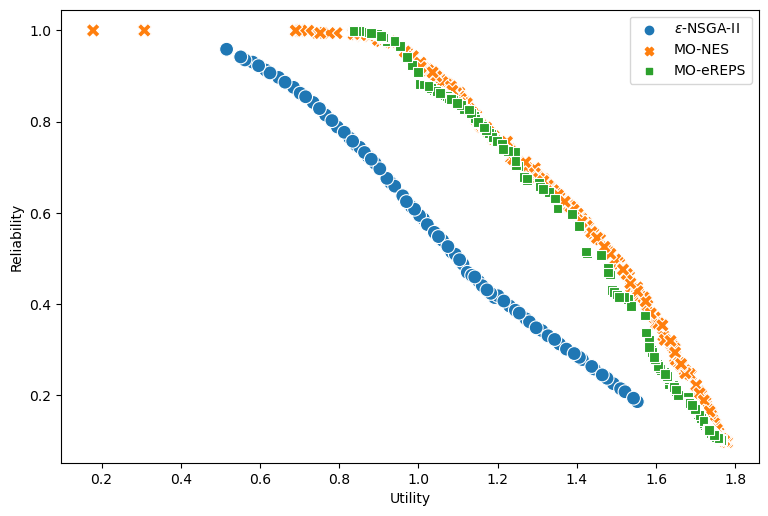

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [21]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# data=pd.concat([ea, nes])
# plt.figure(figsize=(9,6), dpi= 100)
# plt.errorbar(x=ea['utility'], y=ea['reliability'], xerr=ea['u_std'], yerr=ea['r_std'], fmt='o', label ="$\epsilon$-NSGA-II")
# plt.errorbar(x=nes['utility'], y=nes['reliability'], xerr=nes['u_std'], yerr=nes['r_std'], fmt='o', label ="Manifold-Based Policy Search")
# # sns.lineplot(data=data, x="utility", y="reliability", hue="Algorithms")
# plt.xlabel("Utility")
# plt.ylabel("Reliability")
# plt.legend()
# plt.show()